In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/datasets/NATICUSdroid.csv'
df = pd.read_csv(path, encoding='utf-8-sig', engine='python')
df.head()


android.permission.GET_ACCOUNTS  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   com.sonyericsson.home.permission.BROADCAST_BADGE  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   android.permission.READ_PROFILE  android.permission.MANAGE_ACCOUNTS  \
0                                0                                   0   
1                                0                                   0   
2                                0                                   0   
3                                0                                   0   
4                                0                                   0   

   android.permission.WRITE_SYNC_SETTINGS  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   android.permission.READ_EXTERNAL_STORAGE  android.permission.RECEIVE_SMS  \
0                                         0                               0   
1                                         1                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               0   

   com.android.launcher.permission.READ_SETTINGS  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   android.permission.WRITE_SETTINGS  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   com.google.android.providers.gsf.permission.READ_GSERVICES  ...  \
0                                                  0           ...   
1                                                  0           ...   
2                                                  0           ...   
3                                                  0           ...   
4                                                  0           ...   

   com.android.launcher.permission.UNINSTALL_SHORTCUT  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   com.sec.android.iap.permission.BILLING  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   com.htc.launcher.permission.UPDATE_SHORTCUT  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   com.sec.android.provider.badge.permission.WRITE  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   android.permission.ACCESS_NETWORK_

In [5]:
df.columns

Index(['android.permission.GET_ACCOUNTS',
       'com.sonyericsson.home.permission.BROADCAST_BADGE',
       'android.permission.READ_PROFILE', 'android.permission.MANAGE_ACCOUNTS',
       'android.permission.WRITE_SYNC_SETTINGS',
       'android.permission.READ_EXTERNAL_STORAGE',
       'android.permission.RECEIVE_SMS',
       'com.android.launcher.permission.READ_SETTINGS',
       'android.permission.WRITE_SETTINGS',
       'com.google.android.providers.gsf.permission.READ_GSERVICES',
       'android.permission.DOWNLOAD_WITHOUT_NOTIFICATION',
       'android.permission.GET_TASKS',
       'android.permission.WRITE_EXTERNAL_STORAGE',
       'android.permission.RECORD_AUDIO',
       'com.huawei.android.launcher.permission.CHANGE_BADGE',
       'com.oppo.launcher.permission.READ_SETTINGS',
       'android.permission.CHANGE_NETWORK_STATE',
       'com.android.launcher.permission.INSTALL_SHORTCUT',
       'android.permission.android.permission.READ_PHONE_STATE',
       'android.permission.C

In [6]:
df.dtypes

android.permission.GET_ACCOUNTS                                           int64
com.sonyericsson.home.permission.BROADCAST_BADGE                          int64
android.permission.READ_PROFILE                                           int64
android.permission.MANAGE_ACCOUNTS                                        int64
android.permission.WRITE_SYNC_SETTINGS                                    int64
                                                                          ...  
com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE    int64
com.huawei.android.launcher.permission.READ_SETTINGS                      int64
android.permission.READ_SMS                                               int64
android.permission.PROCESS_INCOMING_CALLS                                 int64
Result                                                                    int64
Length: 87, dtype: object

In [7]:
# Calculate correlation matrix
corr = df.corr()

# Get correlation of all features with the target variable
target_corr = corr['Result']

# Print correlations
print(target_corr)

# Plot heatmap of correlation matrix
plt.figure(figsize=(100,100))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


android.permission.GET_ACCOUNTS                                           0.138456
com.sonyericsson.home.permission.BROADCAST_BADGE                         -0.187670
android.permission.READ_PROFILE                                           0.184583
android.permission.MANAGE_ACCOUNTS                                       -0.028821
android.permission.WRITE_SYNC_SETTINGS                                   -0.055581
                                                                            ...   
com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE   -0.156263
com.huawei.android.launcher.permission.READ_SETTINGS                     -0.152853
android.permission.READ_SMS                                               0.185887
android.permission.PROCESS_INCOMING_CALLS                                 0.056975
Result                                                                    1.000000
Name: Result, Length: 87, dtype: float64


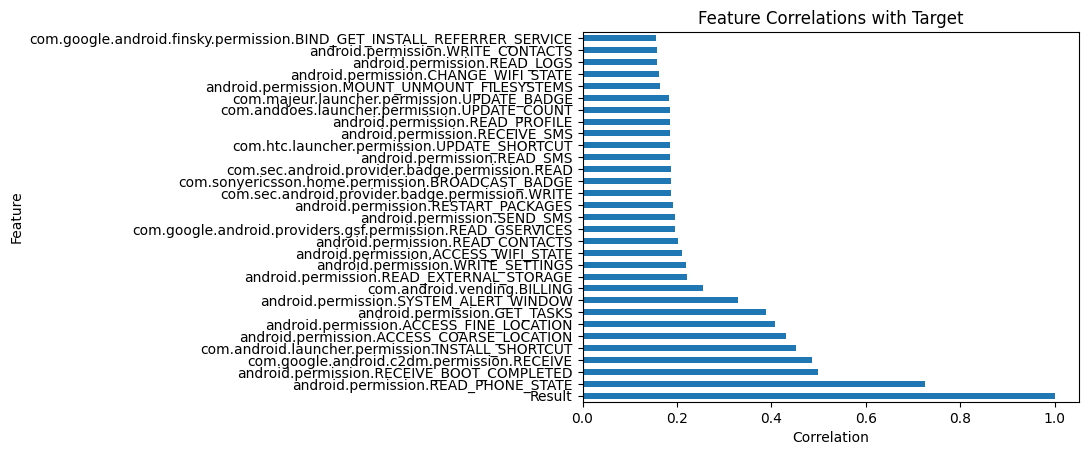

In [8]:
# Calculate correlation matrix
corr = df.corr()

# Get absolute correlations of all features with the target variable
target_corr = corr['Result'].apply(abs)

# Sort by absolute correlation
sorted_corr = target_corr.sort_values(ascending=False)

# Select top n features. Change n to your preference.
n = 31
top_n_features = sorted_corr.index[:n]

# Plot correlations of top-n features with target
sorted_corr[top_n_features].plot(kind='barh')
plt.title('Feature Correlations with Target')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()

In [9]:
# Create new DataFrame with selected features and target
df_selected = df[top_n_features]
df_selected

Result  android.permission.READ_PHONE_STATE  \
0           0                                    0   
1           0                                    0   
2           0                                    0   
3           0                                    0   
4           0                                    0   
...       ...                                  ...   
29327       1                                    1   
29328       1                                    1   
29329       1                                    1   
29330       1                                    0   
29331       1                                    1   

       android.permission.RECEIVE_BOOT_COMPLETED  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
29327                                          0   
29328                                          0   
29329                                          1   
29330                                          0   
29331                                          0   

       com.google.android.c2dm.permission.RECEIVE  \
0                                               0   
1                                               1   
2                                               1   
3                                               1   
4                                               0   
...                                           ...   
29327                                           0   
29328                                           0   
29329                                           0   
29330                                           0   
29331                                           0   

       com.android.launcher.permission.INSTALL_SHORTCUT  \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   
...                                                 ...   
29327                                                 1   
29328                                                 1   
29329                                                 1   
29330                                                 0   
29331                                                 0   

       android.permission.ACCESS_COARSE_LOCATION  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
29327                                          1   
29328                                          1   
29329                                          1   
29330                                          0   
29331                                          1   

       android.permission.ACCESS_FINE_LOCATION  android.permission.GET_TASKS  \
0                                            0                             0   
1                                            0                             0   
2                                            0                             0   
3                                            0                             0   
4                                            0                             0   
...                                        ...                           ...   
29327                                        1                             1   
29328                                        0                             0   
29329                                     

In [10]:
# Select all columns except the first one
X = df_selected.iloc[:, 1:]
X

android.permission.READ_PHONE_STATE  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
29327                                    1   
29328                                    1   
29329                                    1   
29330                                    0   
29331                                    1   

       android.permission.RECEIVE_BOOT_COMPLETED  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
29327                                          0   
29328                                          0   
29329                                          1   
29330                                          0   
29331                                          0   

       com.google.android.c2dm.permission.RECEIVE  \
0                                               0   
1                                               1   
2                                               1   
3                                               1   
4                                               0   
...                                           ...   
29327                                           0   
29328                                           0   
29329                                           0   
29330                                           0   
29331                                           0   

       com.android.launcher.permission.INSTALL_SHORTCUT  \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   
...                                                 ...   
29327                                                 1   
29328                                                 1   
29329                                                 1   
29330                                                 0   
29331                                                 0   

       android.permission.ACCESS_COARSE_LOCATION  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
29327                                          1   
29328                                          1   
29329                                          1   
29330                                          0   
29331                                          1   

       android.permission.ACCESS_FINE_LOCATION  android.permission.GET_TASKS  \
0                                            0                             0   
1                                            0                             0   
2                                            0                             0   
3                                            0                             0   
4                                            0                             0   
...                                        ...                           ...   
29327                                        1                             1   
29328                                        0                             0   
29329                                        1                             1   
29330                                        0            

In [11]:
# Select the first column only
y = df_selected.iloc[:, 0]
y

0        0
1        0
2        0
3        0
4        0
        ..
29327    1
29328    1
29329    1
29330    1
29331    1
Name: Result, Length: 29332, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

# Create a base model
xgb = XGBClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

# Train and predict using the model with best parameters
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

Fitting 5 folds for each of 7056 candidates, totalling 35280 fits
Best parameters: {'colsample_bylevel': 0.8, 'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200, 'subsample': 0.7}


In [15]:
from sklearn.metrics import accuracy_score

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9616499062553264


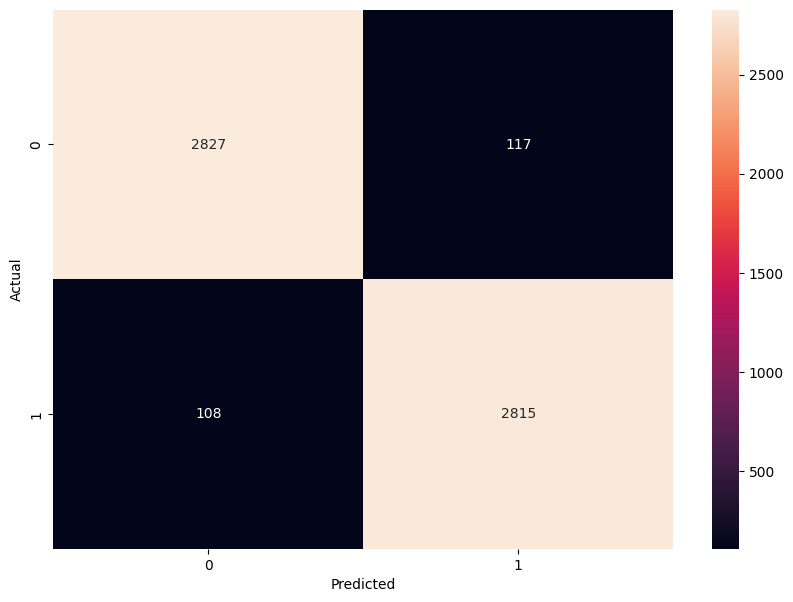

In [16]:
from sklearn.metrics import confusion_matrix

# Get and print confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap from the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()